In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from classy import Class

In [3]:
z_pk = [500.0,100.0,50.0,5.0,0.0]
k_out = [0.001, 0.01, 0.1, 1.0]
cosmo = Class()
cosmo.set({'output':'dTk, lTk', 
           'P_k_max_h/Mpc': 1.0,
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]')})
cosmo.compute()

In [6]:
tks = cosmo.get_transfer(z_pk[-1])
print tks.viewkeys()

dict_keys(['d_tot', 'L_prime', 'L', 'd_ur', 'd_cdm', 'd_b', 'd_g', 'k (h/Mpc)'])


(0.01, 10)

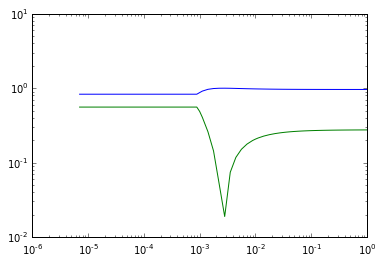

In [7]:
k = tks['k (h/Mpc)']*cosmo.h()
plt.loglog(k,np.abs(tks['L']),k,100*np.abs(tks['L_prime']))
plt.ylim([1e-2,10])

In [11]:
pts = cosmo.get_perturbations()['scalar']
print len(pts)
pt = pts[1]
print pt.viewkeys()

4
dict_keys(['a', 'theta_g', 'phi', 'pol0_g', 'theta_b', 'theta_ur', 'shear_ur', 'shear_g', 'tau [Mpc]', 'theta_cdm', 'L_prime', 'L', 'delta_ur', 'psi', 'pol2_g', 'delta_g', 'delta_cdm', 'pol1_g', 'delta_b'])


(-2, 2)

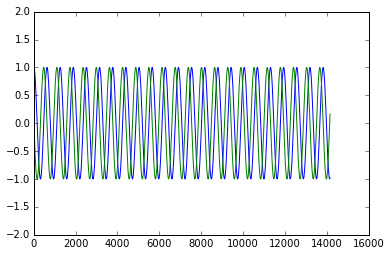

In [14]:
tau = pt['tau [Mpc]']
plt.plot(tau,pt['L'],tau,100*pt['L_prime'])
plt.ylim([-2,2])